# Mise au format du dataframe pour exploitation des données

In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')




In [106]:
#importation des données du fichier json
df = pd.read_json('/Users/wltrh/Documents/data-projet/json/histo-all-bitcoin.json') 

In [107]:
#création d'un dataframe avec les données de la colonne prices, market_caps et total_volumes avec séparation de la date
df[['date', 'price']] = df['prices'].apply(lambda x: pd.Series([x[0], x[1]])).add_prefix('price_')
df[['date', 'market_cap']] = df['market_caps'].apply(lambda x: pd.Series([x[0], x[1]])).add_prefix('market_cap_')
df[['date', 'total_volume']] = df['total_volumes'].apply(lambda x: pd.Series([x[0], x[1]])).add_prefix('total_volume_')

#suppression des colonnes inutiles
df.drop(['prices', 'market_caps', 'total_volumes'], axis=1, inplace=True)

#conversion de la date en datetime
df['date'] = pd.to_datetime(df['date'], unit='ms')
#mise de la date au format datetime année-mois-jour-heure
df['date'] = df['date'].dt.strftime('%Y-%m-%d %H:%M')
#mise de la date en index
df.set_index('date', inplace=True)
df.head()

,price,market_cap,total_volume
date,,,
2020-02-19 00:00,10133.817417,1.849181e+11,5.464801e+10
2020-02-20 00:00,9618.409248,1.753129e+11,5.050274e+10
2020-02-21 00:00,9608.169181,1.748710e+11,5.357914e+10
2020-02-22 00:00,9673.011800,1.767018e+11,3.767817e+10
2020-02-23 00:00,9658.606058,1.760973e+11,3.255534e+10


In [108]:
#recherche de la date max et min du dataframe
print(df.index.min())
print(df.index.max())

#mise au format monnaie de la colonne price
df['price'] = df['price'].apply(lambda x: '{:,.2f}'.format(x))
#mise au format monnaie de la colonne market_cap
df['market_cap'] = df['market_cap'].apply(lambda x: '{:,.2f}'.format(x))
#mise au format monnaie de la colonne total_volume
df['total_volume'] = df['total_volume'].apply(lambda x: '{:,.2f}'.format(x))
df.head()

2020-02-19 00:00
2023-02-17 09:48


,price,market_cap,total_volume
date,,,
2020-02-19 00:00,"10,133.82","184,918,071,499.10","54,648,014,949.72"
2020-02-20 00:00,"9,618.41","175,312,937,106.92","50,502,739,123.75"
2020-02-21 00:00,"9,608.17","174,871,048,291.17","53,579,139,400.81"
2020-02-22 00:00,"9,673.01","176,701,844,101.56","37,678,167,400.72"
2020-02-23 00:00,"9,658.61","176,097,270,350.48","32,555,342,237.08"


In [109]:
#enlever les heurs de la date
df.index = df.index.str[:10]
df.head()

,price,market_cap,total_volume
date,,,
2020-02-19,"10,133.82","184,918,071,499.10","54,648,014,949.72"
2020-02-20,"9,618.41","175,312,937,106.92","50,502,739,123.75"
2020-02-21,"9,608.17","174,871,048,291.17","53,579,139,400.81"
2020-02-22,"9,673.01","176,701,844,101.56","37,678,167,400.72"
2020-02-23,"9,658.61","176,097,270,350.48","32,555,342,237.08"


In [110]:
#passer les données en float
df['price'] = df['price'].str.replace(',', '').astype(float)
df['market_cap'] = df['market_cap'].str.replace(',', '').astype(float)
df['total_volume'] = df['total_volume'].str.replace(',', '').astype(float)
df.head()

,price,market_cap,total_volume
date,,,
2020-02-19,10133.82,1.849181e+11,5.464801e+10
2020-02-20,9618.41,1.753129e+11,5.050274e+10
2020-02-21,9608.17,1.748710e+11,5.357914e+10
2020-02-22,9673.01,1.767018e+11,3.767817e+10
2020-02-23,9658.61,1.760973e+11,3.255534e+10


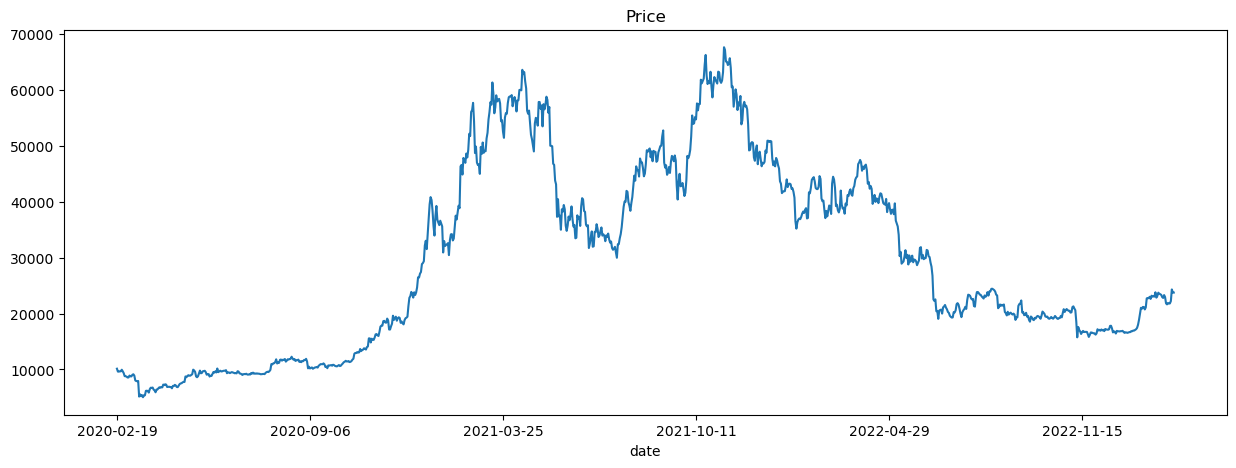

In [111]:
#graphipe de la colonne price
df['price'].plot(figsize=(15, 5), title='Price')
plt.show()

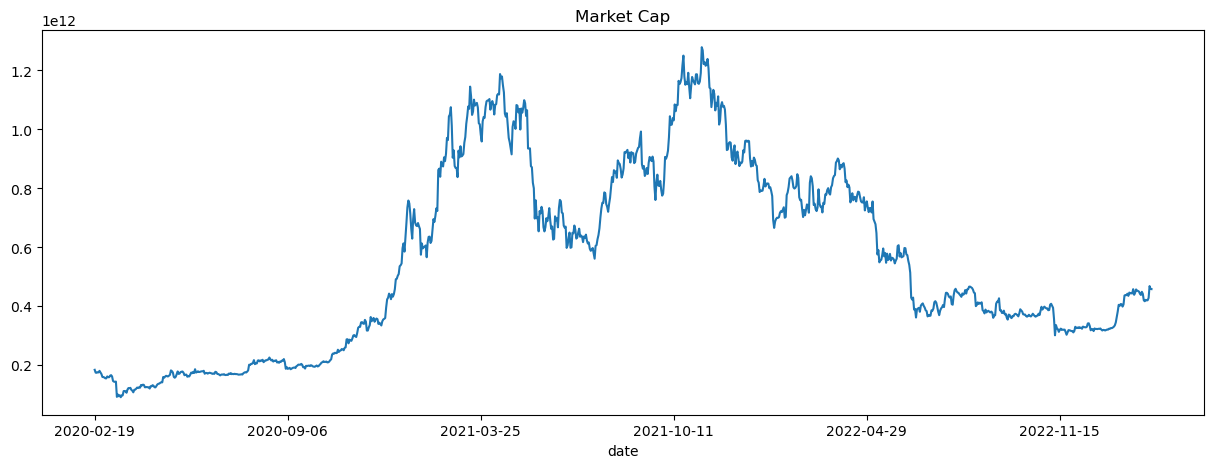

In [112]:
#graphique de la colonne market_cap
df['market_cap'].plot(figsize=(15, 5), title='Market Cap')
plt.show()

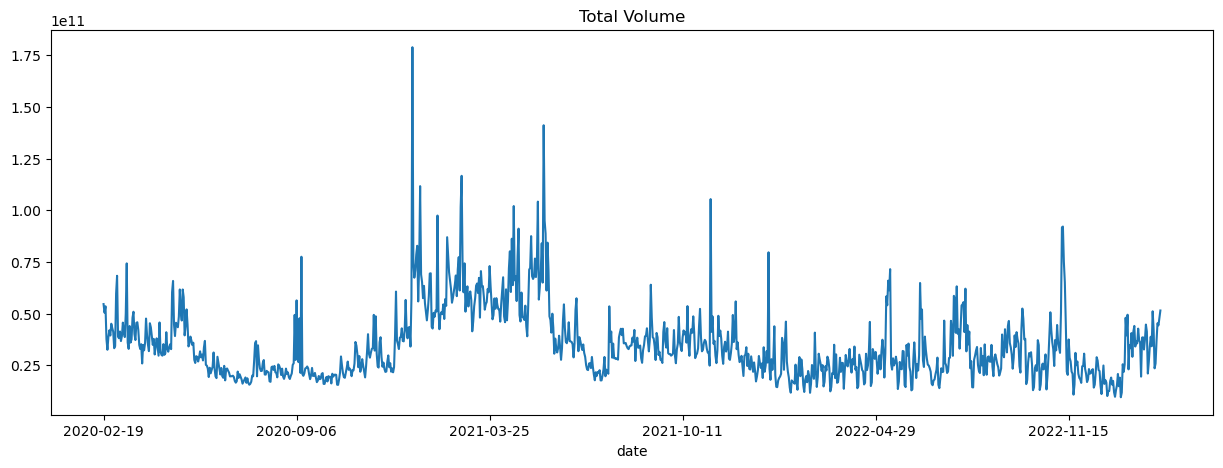

In [113]:
#graphique de la colonne total_volume
df['total_volume'].plot(figsize=(15, 5), title='Total Volume')
plt.show()